In [1]:
from importlib import reload
import config
reload(config)
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

# %load_ext tensorboard

import dataset, model, trainer
import numpy as np
import util

{3: -0.18990836932048816, 4: 0.0907869147880217, 5: 2, 6: 0.40253091919831097, 7: -0.11237450187479325, 8: 0.4196188801552937, 9: -0.41487387081094806, 10: 0.18222608418108666, 11: -0.3134501685019191, 12: -0.26736447987683465, 13: 0.3315824766600579, 14: 0.1440272303973238, 15: 0.42637410500746775, 16: -0.07645302639235718, 17: -0.030059596244764286, 18: -0.20032258866444475, 19: 0.33738835314145776, 20: -0.18853754434027425}


D:\Github\smlm-dl\smlm_dl\dataset.py:220: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


58:	 [x = -1.854,], [y = -8.368,], [z = -3.135,], [A = 1102.764,], [bg = 70.255,],
74:	 [x = 9.128,], [y = 6.956,], [z = -1.656,], [A = 1022.101,], [bg = 4.051,],
29:	 [x = -6.881,], [y = 0.171,], [z = -4.336,], [A = 731.028,], [bg = 96.931,],
39:	 [x = 8.846,], [y = -2.934,], [z = -2.479,], [A = 606.098,], [bg = 6.454,],
45:	 [x = 8.502,], [y = -4.954,], [z = -8.464,], [A = 1368.576,], [bg = 46.473,],
63:	 [x = -4.045,], [y = -4.134,], [z = 1.122,], [A = 859.919,], [bg = 93.069,],
105:	 [x = 5.212,], [y = 4.674,], [z = 5.194,], [A = 1585.096,], [bg = 47.766,],
15:	 [x = -2.491,], [y = 5.332,], [z = 4.314,], [A = 1398.026,], [bg = 45.264,],
14:	 [x = 3.926,], [y = -1.793,], [z = 8.911,], [A = 1692.638,], [bg = 52.646,],
95:	 [x = -3.153,], [y = -6.762,], [z = 1.840,], [A = 788.153,], [bg = 68.556,],
83:	 [x = -2.633,], [y = 5.636,], [z = -7.298,], [A = 1701.685,], [bg = 1.079,],
29:	 [x = 6.992,], [y = 2.210,], [z = -9.634,], [A = 1880.019,], [bg = 80.085,],
27:	 [x = 2.311,], [y = -1.

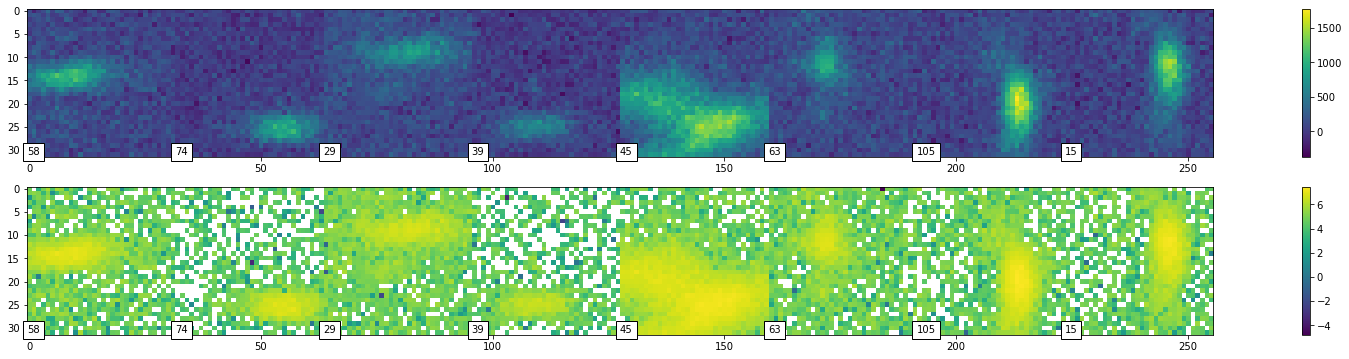

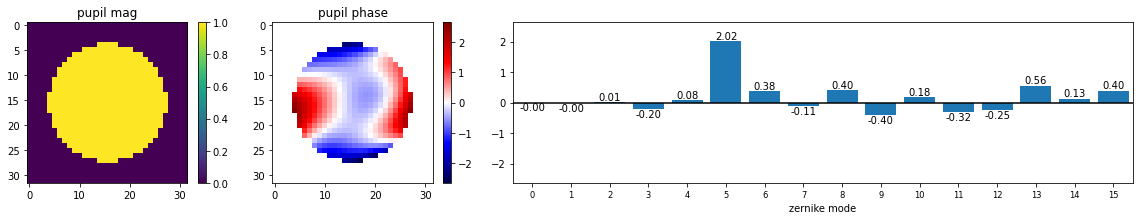

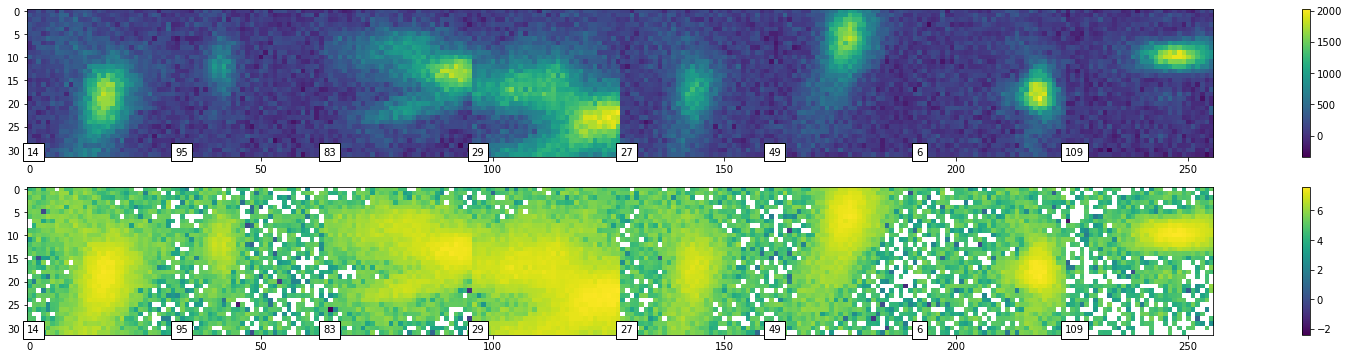

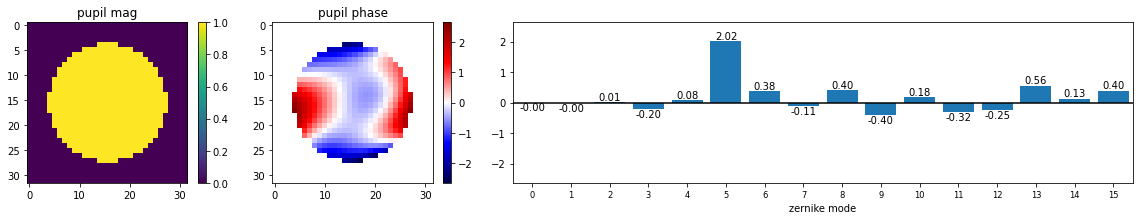

In [2]:
reload(dataset)

psf_zerns = dict()
for z in range(3, 21):
    psf_zerns[z] = np.random.uniform(-0.5, 0.5)
psf_zerns.update({5:2 })

print(psf_zerns)

settings = {
    # 'out_size': (64,64),
    'length': (128, 1),
    'dropout_p': 0,
    'psf_zerns': psf_zerns,
    # 'noise_params': {},
    'normalize': False,
    'padding': (4,4),
    'random_z': True,
    "augmentations":{},
    # "augmentations":{"pixel shift":(4,4), }#"add noise":0.1},
}

# training_data = dataset.FourierOptics2DPSFDataset(**settings)
# training_data = dataset.Gaussian2DPSFDataset(**settings)
training_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(training_data)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


# valid_data = dataset.FourierOptics2DPSFDataset(**settings)
# valid_data = dataset.Gaussian2DPSFDataset(**settings)
valid_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(valid_data)
valid_dataloader = DataLoader(valid_data, batch_size=64, shuffle=True)

C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-08_14-44-50_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 120327.750000
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 124623.218750
****************************************************************************************************
Validation, average loss = 111675.359375
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-08_14-44-50_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'en

D:\Github\smlm-dl\smlm_dl\model.py:651: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img[0]))


D:\Pytorch\runs\2021-12-08_14-44-50_DESKTOP-7NNT713
No training data supplied. Remember to set prior to training.
No validation data supplied. Remember to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from D:\Pytorch\runs\2021-12-08_14-44-50_DESKTOP-7NNT713\model.ptm, last modified: Wed Dec  8 14:44:50 2021
Layer (type:depth-idx)                   Param #
Gaussian2DModel                          --
├─Gaussian2DRenderer: 1-1                --
├─EncoderModel: 1-2                      --
│    └─ModuleDict: 2-1                   --
│    │    └─Sequential: 3-1              2,514
│    │    └─Sequential: 3-2              13,984
│    │    └─Sequential: 3-3              55,616
│    └─ModuleDict: 2-2                   --
│    └─ModuleDict: 2-3                   --
│    │    └─Sequential: 3-4              221,824
│    │    └─Sequential: 3-5              131,392
│    └─ModuleDict: 2-4                   --
│    │    └─Conv2d: 3-6                  325
Total params: 

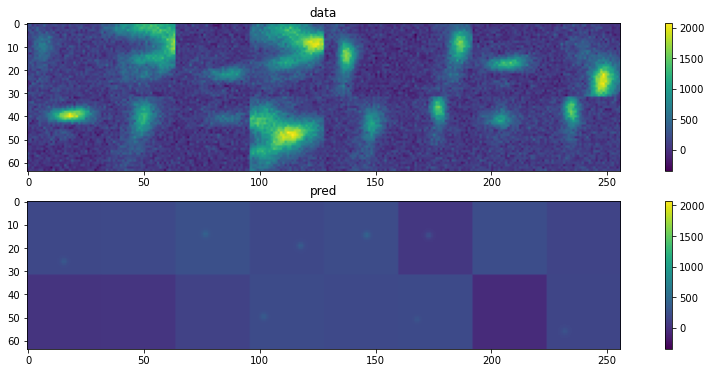

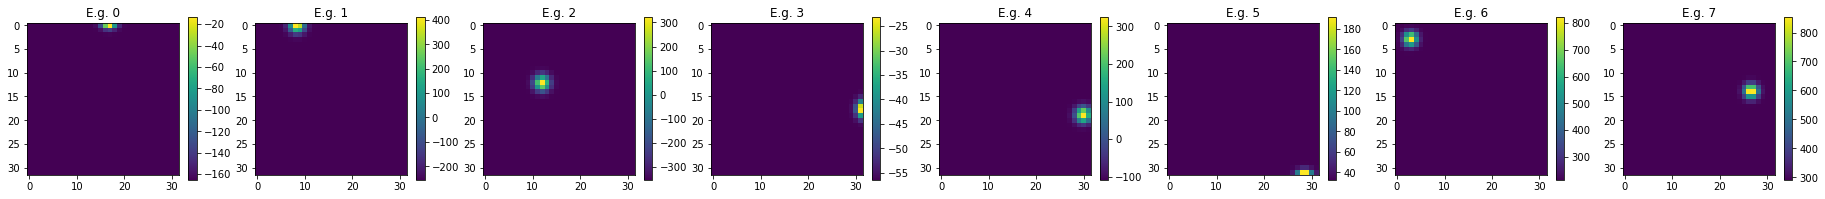

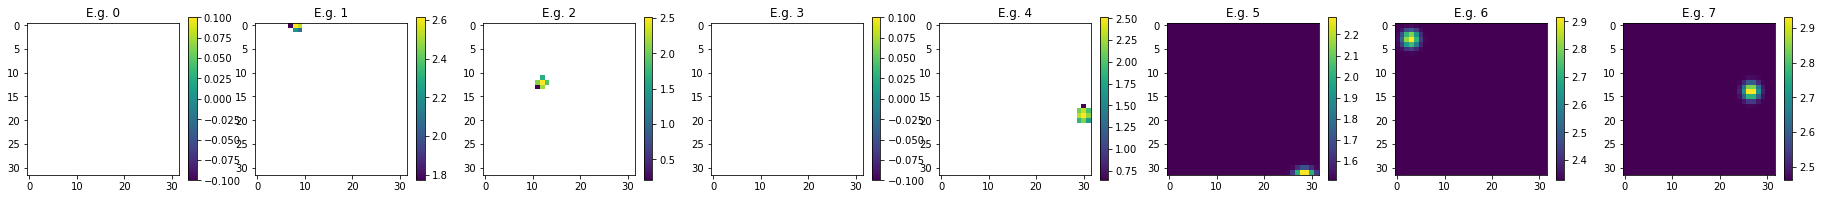

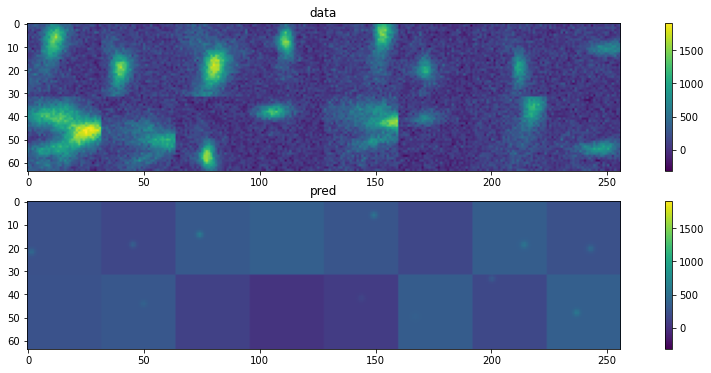

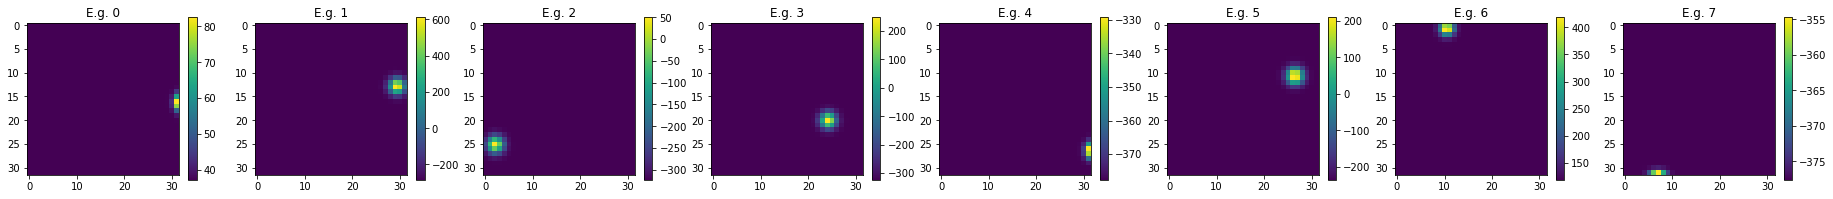

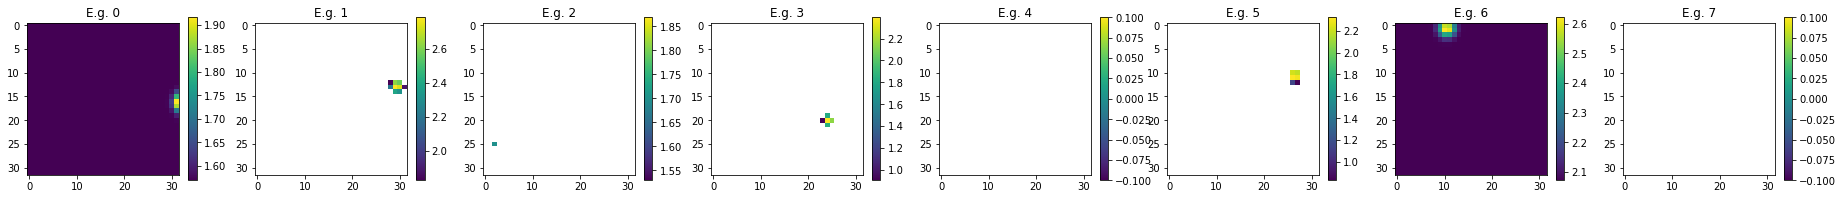

In [3]:
reload(trainer)
fitting_model = model.Gaussian2DModel(fit_params=['x','y','sig', 'A', 'bg'])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, label="test")
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-08_14-45-01_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0


C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(


Epoch # 0, Batch # 1 (128/128), loss = 101851.609375
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 98418.515625
****************************************************************************************************
Validation, average loss = 96578.328125
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-08_14-45-01_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.1.weight', 'encoder.encoders.

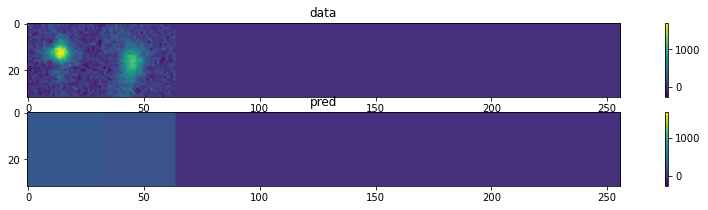

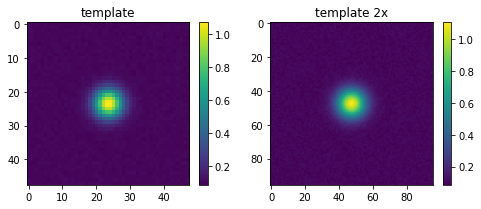

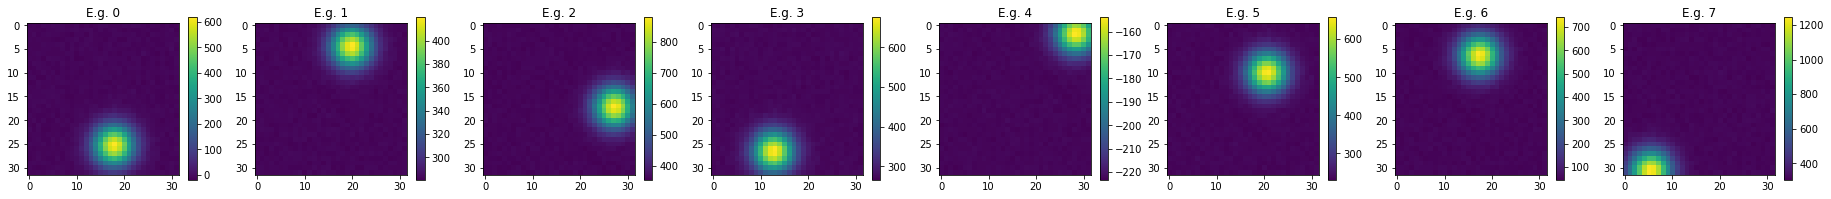

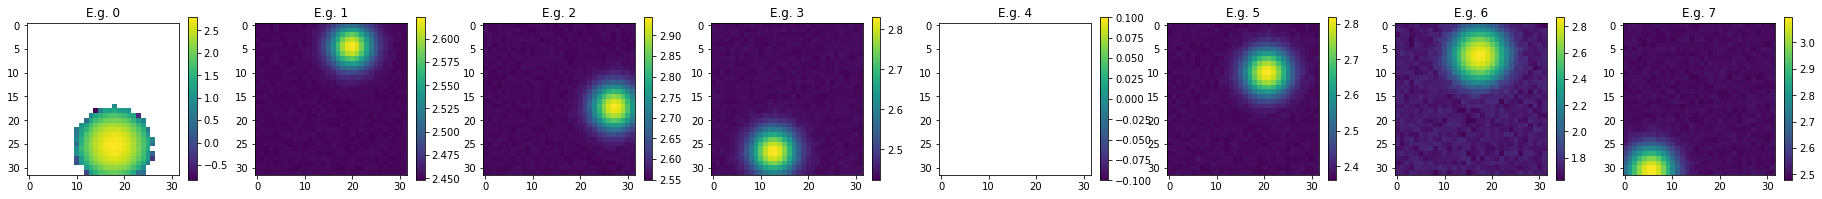

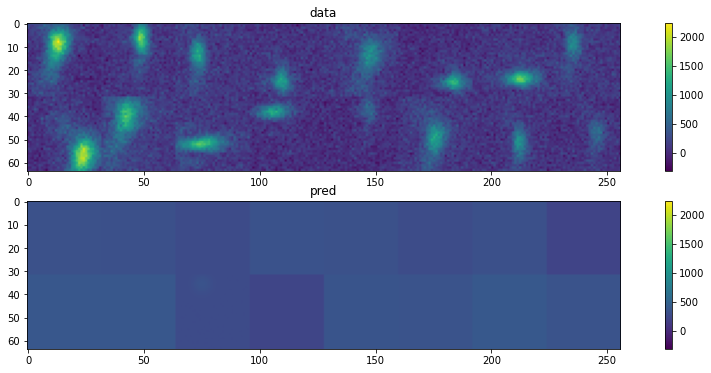

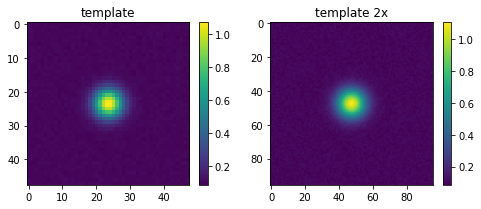

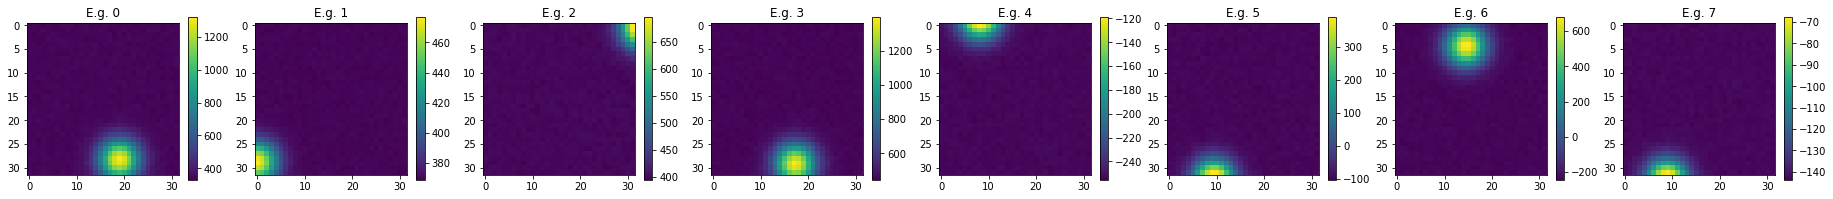

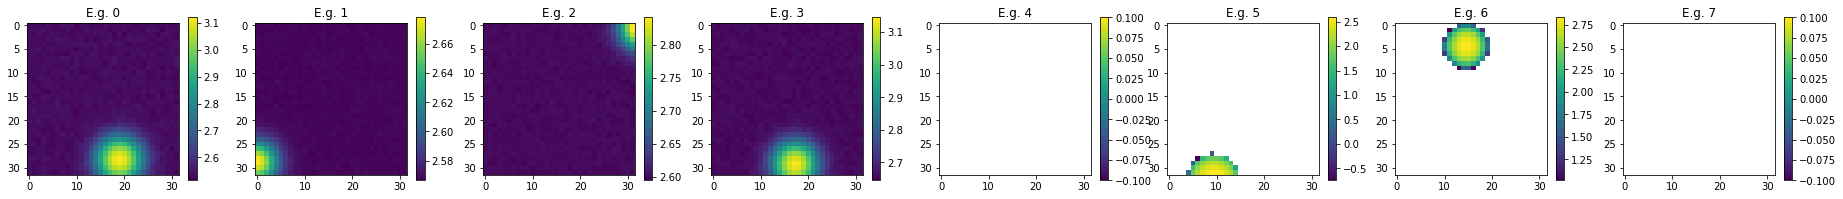

In [4]:
reload(trainer)
fitting_model = model.Template2DModel(fit_params=['x','y','A','bg'],                                      
                                      template_padding=(8,8),
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_log_limit_images=2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, validate_interval=1, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-08_14-45-14_DESKTOP-7NNT713\model.ptm
Starting training Epoch # 0
Epoch # 0, Batch # 1 (128/128), loss = 148926.750000
Starting training Epoch # 1
Epoch # 1, Batch # 1 (128/128), loss = 147974.781250
****************************************************************************************************
Validation, average loss = 146822.109375
****************************************************************************************************
Saved to : D:\Pytorch\runs\2021-12-08_14-45-14_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder

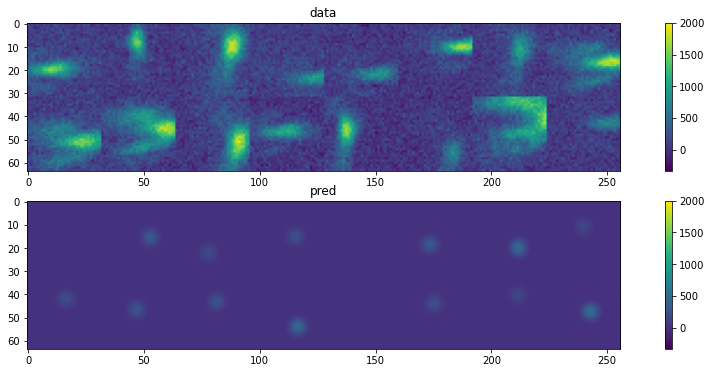

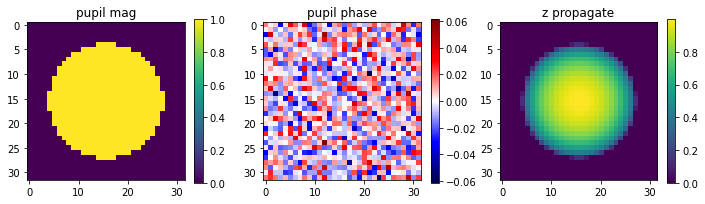

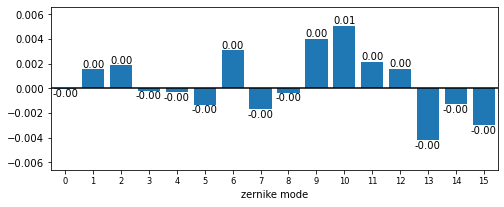

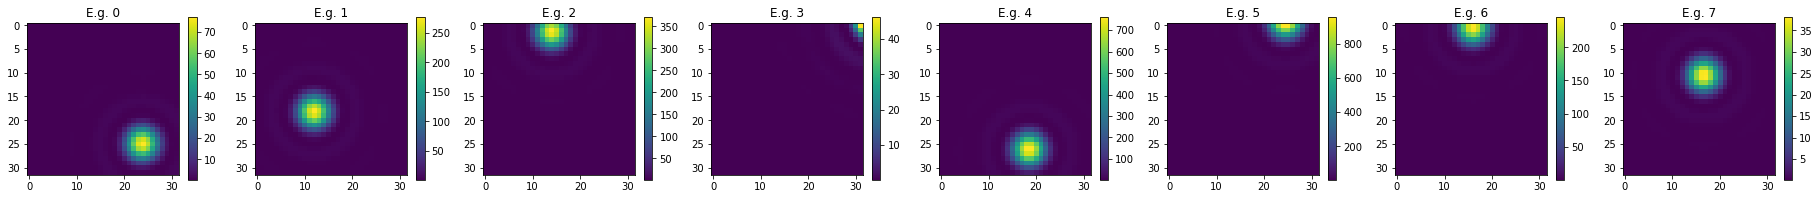

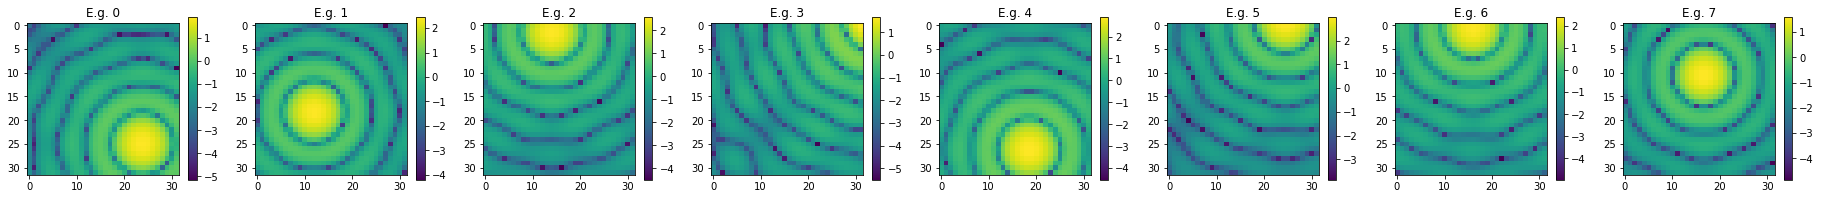

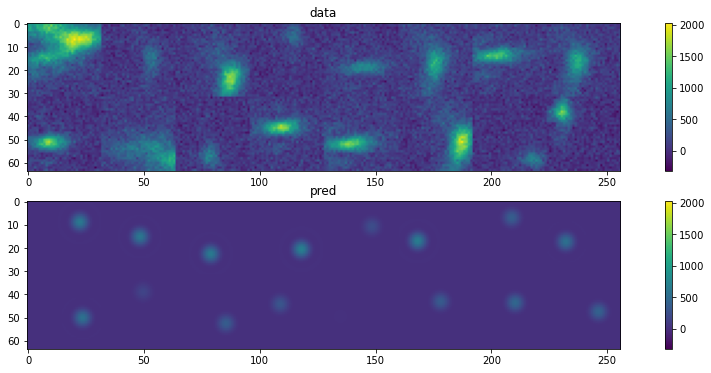

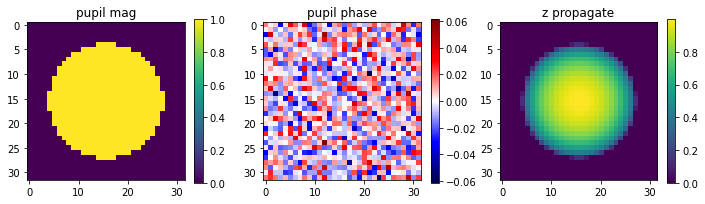

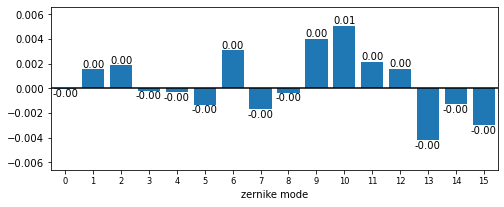

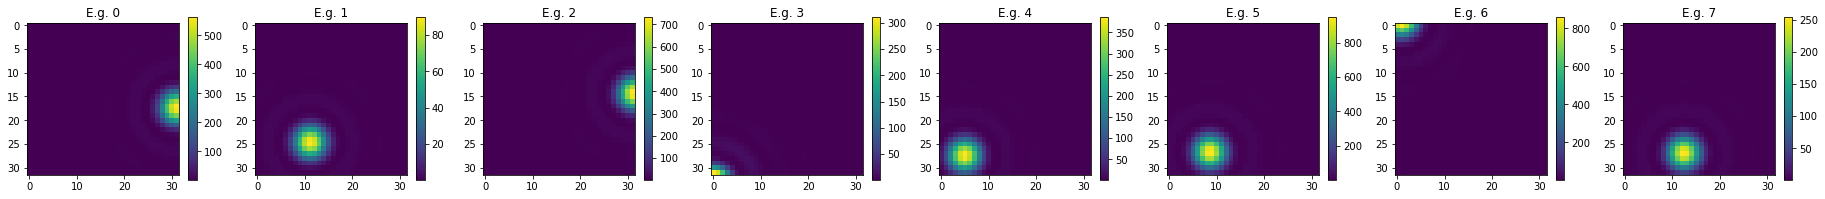

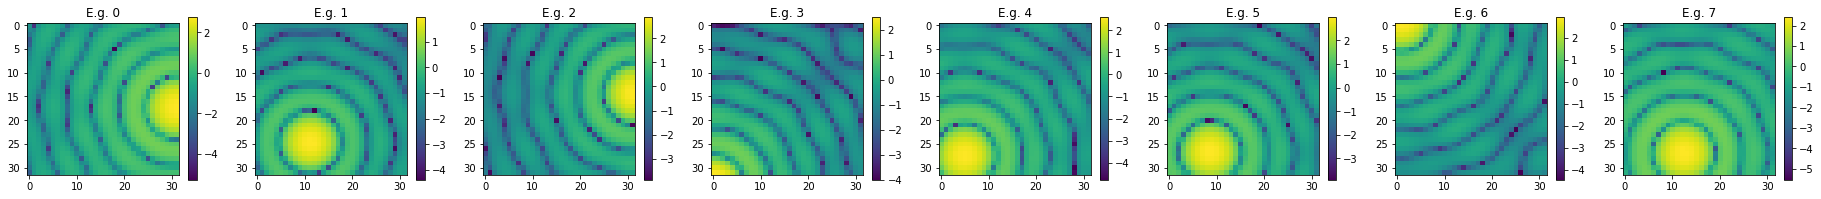

In [5]:
reload(trainer)
fitting_model = model.FourierOptics2DModel(fit_params=['x','y','A', ])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )